# Effects of multivariate prewhitening on distance estimates

In [1]:
import rsatoolbox as rsa
import numpy as np
import PcmPy as pcm
import scipy.spatial.distance as sd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sim_crossval import crossval_sim  

In [62]:
centroids = np.array([[-1.2,-1.2],[0,2.0],[1.6,0.1]])
sigma = np.array([[1,-0.7],[-0.7,1]])
A = np.linalg.cholesky(sigma)
B = np.linalg.cholesky(np.linalg.inv(sigma))
# Generate data for each condition
n = 100
data = np.zeros((3,n,2))
wdata = np.zeros((3,n,2))
for i in range(3):
    data[i] = np.random.randn(n,2) @ A.T+ centroids[i]
    wdata[i] = data[i] @ B


In [73]:
def plot_figure(data,centroids):
    ax=plt.gca()
    color = np.array([[0.9,0.2,0.2],[0.1,0.8,0.1],[0.2,0.2,0.9]])
    for i in range(3):
        ax.scatter(data[i,:,0],data[i,:,1],color=color[i],alpha=0.1)
        ax.scatter(centroids[i,0],centroids[i,1],color=color[i],marker='x',s=100,alpha=1)
        ax.set_xlim([-5,5])
        ax.set_ylim([-5,5])
        ax.set_aspect('equal')
        # Remove box
        ax.set_xticks([])
        ax.set_yticks([])


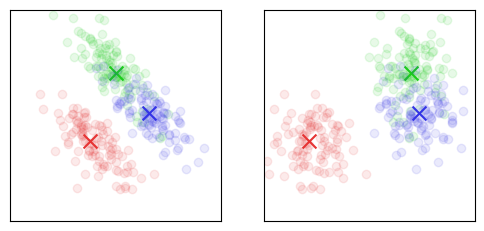

In [76]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_figure(data,centroids)
plt.subplot(1,2,2)
plot_figure(wdata,centroids @ B)
plt.savefig('mahalanobis_example_data.pdf')

In [60]:
B.T@A@A.T@B

array([[1.00000000e+00, 5.71035289e-17],
       [2.19867915e-18, 1.00000000e+00]])